In [1]:
#aggregate spaghetti plots of the target for 
#non-business and business users over the 24 hours of all days

In [3]:
import pandas as pd
import os

In [5]:
data_head = r"C:\Users\Joe\Documents\Project Programming\enefit\predict-energy-behavior-of-prosumers\data"
data_file = 'train.csv'
df = pd.read_csv(os.path.join(data_head,data_file))

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0         2021-09-01 00:00:00
1         2021-09-01 00:00:00
2         2021-09-01 00:00:00
3         2021-09-01 00:00:00
4         2021-09-01 00:00:00
                  ...        
2018347   2023-05-31 23:00:00
2018348   2023-05-31 23:00:00
2018349   2023-05-31 23:00:00
2018350   2023-05-31 23:00:00
2018351   2023-05-31 23:00:00
Name: datetime, Length: 2018352, dtype: datetime64[ns]

In [10]:
df['Time of Day']=df['datetime'].dt.hour

In [114]:
cons_bool = 0
mean_df = pd.DataFrame(df[df['is_consumption']==cons_bool].groupby(['is_business','Time of Day'])['target'].mean())
std_df = pd.DataFrame(df[df['is_consumption']==cons_bool].groupby(['is_business','Time of Day'])['target'].std())

In [115]:
pivot_mean_df = pd.pivot_table(mean_df.reset_index(),values='target',index='Time of Day',columns='is_business')
pivot_std_df = pd.pivot_table(std_df.reset_index(),values='target',index='Time of Day',columns='is_business')
pivot_mean_df

is_business,0,1
Time of Day,,
0,0.408370,1.141318
1,0.365576,1.132825
2,0.331051,1.118118
3,0.302942,1.141365
4,0.355534,1.200843
5,1.833283,2.563595
6,8.918230,8.364271
7,30.295718,27.177301
8,79.842062,68.698138


In [116]:
pivot_dist_df = pivot_mean_df.copy()
z=1.96 #95% confidence interval
businesses = (df['is_business']==1).sum()
nonbusinesses = df.shape[0]-businesses

businesses/=24 #assuming equal number of businesses per hour
nonbusinesses/=24

pivot_dist_df['business_lower_range'] = pivot_mean_df[1] - z*pivot_std_df[1]/(businesses**0.5)
pivot_dist_df['business_upper_range'] = pivot_mean_df[1] + z*pivot_std_df[1]/(businesses**0.5)
pivot_dist_df['nonbusiness_lower_range'] = pivot_mean_df[0] - z*pivot_std_df[0]/(nonbusinesses**0.5)
pivot_dist_df['nonbusiness_upper_range'] = pivot_mean_df[0] + z*pivot_std_df[0]/(nonbusinesses**0.5)
pivot_dist_df=pivot_dist_df.clip(0)
pivot_dist_df

is_business,0,1,business_lower_range,business_upper_range,nonbusiness_lower_range,nonbusiness_upper_range
Time of Day,,,,,,
0,0.408370,1.141318,1.082521,1.200116,0.396431,0.420308
1,0.365576,1.132825,1.074092,1.191558,0.355142,0.376010
2,0.331051,1.118118,1.059620,1.176617,0.318948,0.343155
3,0.302942,1.141365,1.082170,1.200559,0.294451,0.311432
4,0.355534,1.200843,1.141478,1.260208,0.345887,0.365182
5,1.833283,2.563595,2.453772,2.673419,1.756986,1.909581
6,8.918230,8.364271,8.033544,8.694999,8.570398,9.266061
7,30.295718,27.177301,26.189858,28.164744,29.283385,31.308051
8,79.842062,68.698138,66.456148,70.940127,77.517890,82.166234


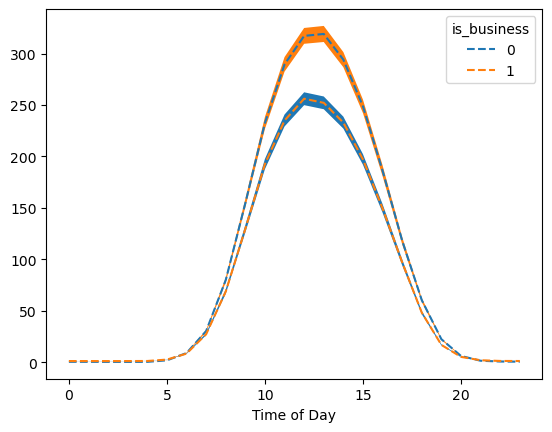

In [117]:
import matplotlib.pyplot as plt
pivot_mean_df.plot(linestyle='--')
plt.fill_between(pivot_dist_df.index,pivot_dist_df['business_lower_range'],pivot_dist_df['business_upper_range'])
plt.fill_between(pivot_dist_df.index,pivot_dist_df['nonbusiness_lower_range'],pivot_dist_df['nonbusiness_upper_range'])